# Instagram Fake vs Genuine – EDA + Baseline Model

Run this notebook after placing `train.csv` and `test.csv` in `../data/`.

In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

DATA_DIR = os.path.join('..', 'data')
train_path = os.path.join(DATA_DIR, 'train.csv')
test_path  = os.path.join(DATA_DIR, 'test.csv')

df = pd.read_csv(train_path)
df.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.0,0,0,0,1,13,159,98,0
3,1,0.00,1,0.0,0,82,0,0,679,414,651,0
4,1,0.00,2,0.0,0,0,0,1,6,151,126,0


In [5]:
# Quick schema + NA check
display(df.info())
df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           576 non-null    int64  
 1   nums/length username  576 non-null    float64
 2   fullname words        576 non-null    int64  
 3   nums/length fullname  576 non-null    float64
 4   name==username        576 non-null    int64  
 5   description length    576 non-null    int64  
 6   external URL          576 non-null    int64  
 7   private               576 non-null    int64  
 8   #posts                576 non-null    int64  
 9   #followers            576 non-null    int64  
 10  #follows              576 non-null    int64  
 11  fake                  576 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 54.1 KB


None

profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64

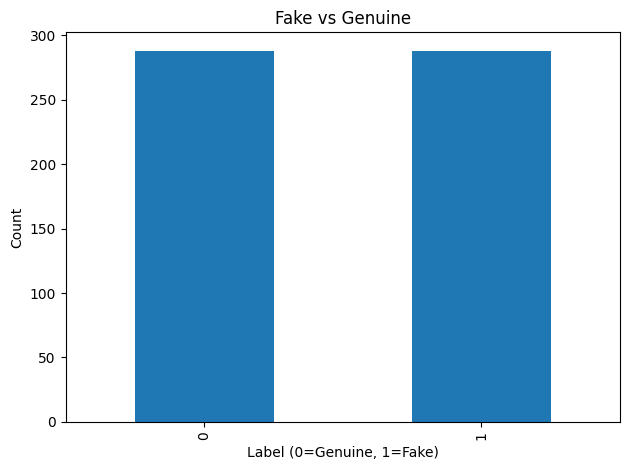

In [6]:
# Target distribution
df['fake'].value_counts().plot(kind='bar', title='Fake vs Genuine')
plt.xlabel('Label (0=Genuine, 1=Fake)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


              precision    recall  f1-score   support

           0      0.892     0.917     0.904        72
           1      0.914     0.889     0.901        72

    accuracy                          0.903       144
   macro avg      0.903     0.903     0.903       144
weighted avg      0.903     0.903     0.903       144



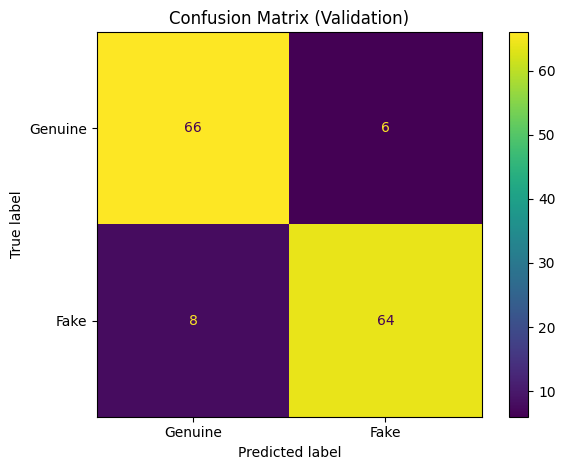

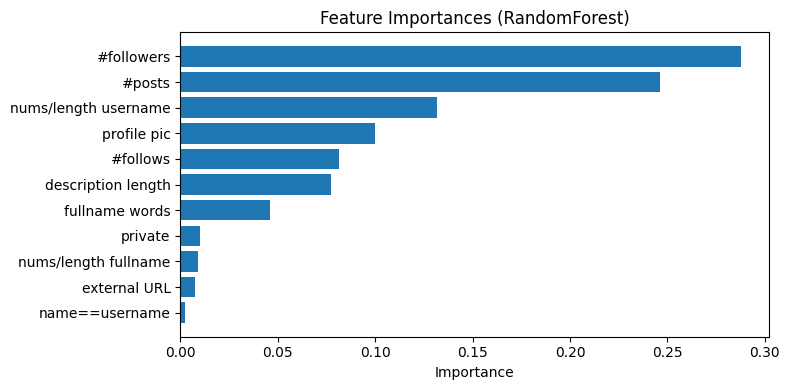

In [7]:
# Train/val split and baseline model
X = df.drop(columns=['fake'])
y = df['fake'].astype(int)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

model = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

y_pred = model.predict(X_val)
print(classification_report(y_val, y_pred, digits=3))

ConfusionMatrixDisplay.from_predictions(y_val, y_pred, display_labels=['Genuine','Fake'])
plt.title('Confusion Matrix (Validation)')
plt.tight_layout()
plt.show()

# Feature importances
importances = model.feature_importances_
order = np.argsort(importances)[::-1]
plt.figure(figsize=(8, max(4, len(order)*0.3)))
plt.barh(np.array(X.columns)[order][::-1], importances[order][::-1])
plt.xlabel('Importance')
plt.title('Feature Importances (RandomForest)')
plt.tight_layout()
plt.show()
